In [1]:
# Section 1: Load Preprocessed Data

import pandas as pd

# Load processed balanced training data
X_train = pd.read_csv("../data/processed/X_train_balanced.csv")
y_train = pd.read_csv("../data/processed/y_train_balanced.csv")

# Load test data
X_test = pd.read_csv("../data/processed/X_test_scaled.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

print("✅ Data Loaded")
print("🧪 Train shape:", X_train.shape)
print("🧪 Test shape:", X_test.shape)


✅ Data Loaded
🧪 Train shape: (219136, 13)
🧪 Test shape: (30223, 13)


In [2]:
# Section 2: Train Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_curve, average_precision_score

# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

# Predict
y_pred_lr = logreg.predict(X_test)
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

# Evaluate
print("📊 Logistic Regression Evaluation")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("🔍 AUC-PR:", average_precision_score(y_test, y_proba_lr))
print("🎯 F1 Score:", f1_score(y_test, y_pred_lr))


📊 Logistic Regression Evaluation
[[20305  7088]
 [ 1185  1645]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     27393
           1       0.19      0.58      0.28      2830

    accuracy                           0.73     30223
   macro avg       0.57      0.66      0.56     30223
weighted avg       0.87      0.73      0.78     30223

🔍 AUC-PR: 0.2224603957379064
🎯 F1 Score: 0.28452823661679494


/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# install required packages if not already installed
!pip install xgboost lightgbm catboost --quiet

In [5]:
# Section 3: Train XGBoost Model

import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train.values.ravel())

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("📊 XGBoost Evaluation")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("🔍 AUC-PR:", average_precision_score(y_test, y_proba_xgb))
print("🎯 F1 Score:", f1_score(y_test, y_pred_xgb))


/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [02:07:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Evaluation
[[27312    81]
 [ 1336  1494]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.95      0.53      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.95      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223

🔍 AUC-PR: 0.6171018512969391
🎯 F1 Score: 0.6783200908059024


In [6]:
# Section 4: Save Models for Task 3

import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(logreg, "../models/logistic_model.pkl")
joblib.dump(xgb_model, "../models/xgb_model.pkl")

print("💾 Models saved in ../models/")


💾 Models saved in ../models/


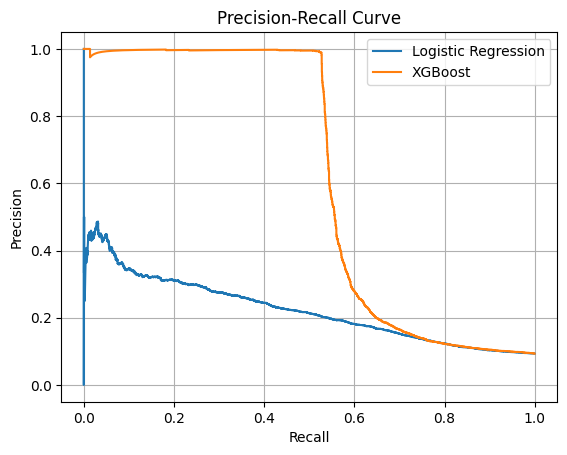

In [7]:
# Plot PR Curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)

plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_xgb, precision_xgb, label='XGBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


### Part 2 - Try organized way for the code to be written

In [ ]:
!pip install xgboost lightgbm catboost --quiet

In [11]:
# section 1: imports and data loading

# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    average_precision_score, precision_recall_curve
)
import matplotlib.pyplot as plt
import joblib
import os

# create models directory if it doesn't exist
os.makedirs("../models", exist_ok=True)

# load training and test sets
x_train = pd.read_csv("../data/processed/X_train_balanced.csv")
y_train = pd.read_csv("../data/processed/y_train_balanced.csv")
x_test = pd.read_csv("../data/processed/X_test_scaled.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

print("✅ data loaded")
print("🧪 training set:", x_train.shape)
print("🧪 test set:", x_test.shape)


✅ data loaded
🧪 training set: (219136, 13)
🧪 test set: (30223, 13)


In [10]:
# section 2: utility functions for training and evaluation


# function to train a given model
def train_model(model, x_train, y_train):
    model.fit(x_train, y_train.values.ravel())
    return model

# function to evaluate a model and return performance
def evaluate_model(model, x_test, y_test, name="model"):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    
    f1 = f1_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_proba)
    
    print(f"\n📊 {name} evaluation")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("🔍 auc-pr:", auc_pr)
    print("🎯 f1 score:", f1)
    
    return {
        "model": model,
        "name": name,
        "f1": f1,
        "auc_pr": auc_pr,
        "y_pred": y_pred,
        "y_proba": y_proba
    }

# function to plot precision-recall curve for all models
def plot_precision_recall(results):
    plt.figure(figsize=(8, 5))
    for res in results:
        precision, recall, _ = precision_recall_curve(y_test, res['y_proba'])
        plt.plot(recall, precision, label=res['name'])
    
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title("precision-recall curve")
    plt.legend()
    plt.grid(True)
    plt.show()


In [13]:
# section 3: model training and comparison

# define models to train and compare
models = [
    ("logistic regression", LogisticRegression(max_iter=1000)),
    ("xgboost", XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ("lightgbm", LGBMClassifier()),
    ("catboost", CatBoostClassifier(verbose=0))
]

# train and evaluate each model
results = []
for name, model in models:
    print(f"\n🚀 training {name}...")
    trained_model = train_model(model, x_train, y_train)
    res = evaluate_model(trained_model, x_test, y_test, name)
    results.append(res)




🚀 training logistic regression...


/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [02:44:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 logistic regression evaluation
[[20305  7088]
 [ 1185  1645]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     27393
           1       0.19      0.58      0.28      2830

    accuracy                           0.73     30223
   macro avg       0.57      0.66      0.56     30223
weighted avg       0.87      0.73      0.78     30223

🔍 auc-pr: 0.2224603957379064
🎯 f1 score: 0.28452823661679494

🚀 training xgboost...

📊 xgboost evaluation
[[27312    81]
 [ 1336  1494]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.95      0.53      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.95      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223

🔍 auc-pr: 0.6171018512969391
🎯 f1 score: 0.6783200908059024

🚀 training lightgbm...
[LightGBM] [Info] Number of positive: 109568, number of nega

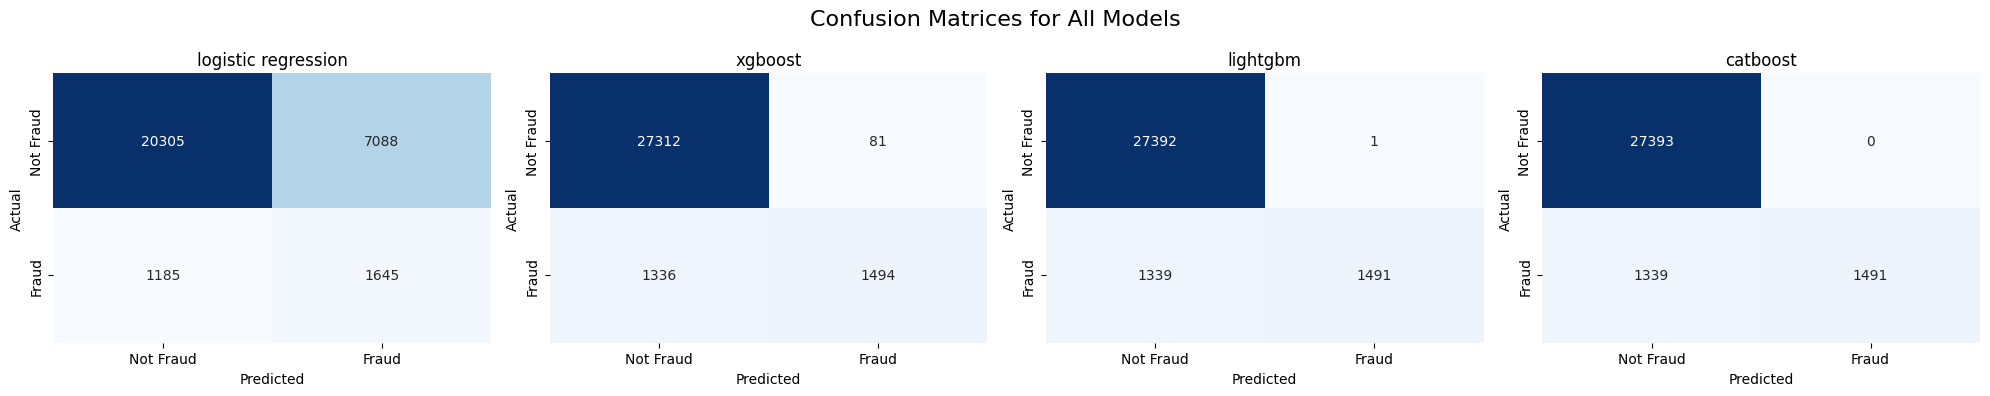

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# define a plotting function for confusion matrices
def plot_confusion_matrices(results, y_true, labels=["Not Fraud", "Fraud"]):
    fig, axes = plt.subplots(1, len(results), figsize=(5 * len(results), 4))

    if len(results) == 1:
        axes = [axes]

    for i, res in enumerate(results):
        cm = confusion_matrix(y_true, res['y_pred'])
        ax = axes[i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                    xticklabels=labels, yticklabels=labels, cbar=False)
        ax.set_title(f"{res['name']}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.suptitle("Confusion Matrices for All Models", fontsize=16)
    plt.tight_layout()
    plt.show()

# call the function with your results
plot_confusion_matrices(results, y_test)

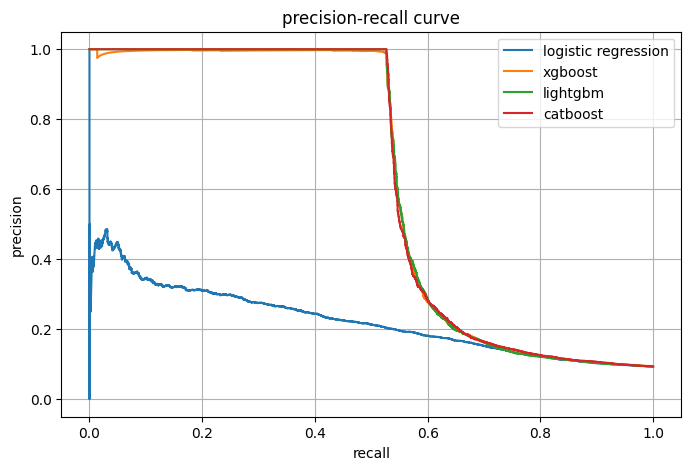


🏆 best model: catboost with f1 score: 0.6901
💾 best model saved to: ../models/catboost_best.pkl


In [16]:
# section 4: precision-recall curve and best model selection

# plot precision-recall curve for all models
plot_precision_recall(results)

# find best model based on f1 score
best_model = max(results, key=lambda x: x["f1"])
print(f"\n🏆 best model: {best_model['name']} with f1 score: {best_model['f1']:.4f}")

# save the best model to pkl
model_filename = f"../models/{best_model['name'].replace(' ', '_').lower()}_best.pkl"
joblib.dump(best_model["model"], model_filename)
print(f"💾 best model saved to: {model_filename}")


In [17]:
# Section 6: Model Improvement Strategies

import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

print("🔧 IMPLEMENTING MODEL IMPROVEMENT STRATEGIES")
print("=" * 60)

🔧 IMPLEMENTING MODEL IMPROVEMENT STRATEGIES


In [18]:
# Strategy 1: Hyperparameter Tuning for Best Models

def tune_xgboost():
    """Tune XGBoost hyperparameters"""
    print("\n🎯 Tuning XGBoost hyperparameters...")
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train.values.ravel())
    
    print(f"✅ Best XGBoost parameters: {grid_search.best_params_}")
    print(f"✅ Best CV F1 score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

def tune_lightgbm():
    """Tune LightGBM hyperparameters"""
    print("\n🎯 Tuning LightGBM hyperparameters...")
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'num_leaves': [31, 50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'feature_fraction': [0.8, 0.9, 1.0],
        'bagging_fraction': [0.8, 0.9, 1.0]
    }
    
    lgb_model = LGBMClassifier(random_state=42, verbose=-1)
    grid_search = GridSearchCV(lgb_model, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train.values.ravel())
    
    print(f"✅ Best LightGBM parameters: {grid_search.best_params_}")
    print(f"✅ Best CV F1 score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Tune models (this may take a few minutes)
try:
    best_xgb = tune_xgboost()
    best_lgb = tune_lightgbm()
    
    # Evaluate tuned models
    tuned_results = []
    
    for name, model in [("Tuned XGBoost", best_xgb), ("Tuned LightGBM", best_lgb)]:
        res = evaluate_model(model, x_test, y_test, name)
        tuned_results.append(res)
        
except Exception as e:
    print(f"⚠️ Hyperparameter tuning failed: {e}")
    print("Using default parameters instead...")
    tuned_results = []


🎯 Tuning XGBoost hyperparameters...
Fitting 3 folds for each of 243 candidates, totalling 729 fits


/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/mebsahle/Documents/10x/week8-9/fraud-detection-modeling-ecommerce-banking-transactions/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration

✅ Best XGBoost parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
✅ Best CV F1 score: 0.9633

🎯 Tuning LightGBM hyperparameters...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
✅ Best LightGBM parameters: {'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.2, 'n_estimators': 300, 'num_leaves': 100}
✅ Best CV F1 score: 0.9720

📊 Tuned XGBoost evaluation
[[27324    69]
 [ 1336  1494]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27393
           1       0.96      0.53      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.95      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223

🔍 auc-pr: 0.615692144525434
🎯 f1 score: 0.6801730025039836

📊 Tuned LightGBM evaluation
[[27382    11]
 [ 1339  1491]]
              precision    recall  f1-score   support

           0  

In [19]:
# Strategy 2: Advanced Feature Engineering

def create_advanced_features(X_train, X_test):
    """Create advanced features to improve model performance"""
    print("\n🔬 Creating advanced features...")
    
    X_train_enhanced = X_train.copy()
    X_test_enhanced = X_test.copy()
    
    # 1. Feature interactions
    print("   • Creating feature interactions...")
    X_train_enhanced['age_purchase_interaction'] = X_train['age'] * X_train['purchase_value']
    X_test_enhanced['age_purchase_interaction'] = X_test['age'] * X_test['purchase_value']
    
    X_train_enhanced['hour_value_interaction'] = X_train['purchase_hour'] * X_train['purchase_value']
    X_test_enhanced['hour_value_interaction'] = X_test['purchase_hour'] * X_test['purchase_value']
    
    # 2. Binning continuous variables
    print("   • Creating binned features...")
    # Purchase value bins
    X_train_enhanced['purchase_value_bin'] = pd.cut(X_train['purchase_value'], 
                                                   bins=5, labels=False)
    X_test_enhanced['purchase_value_bin'] = pd.cut(X_test['purchase_value'], 
                                                  bins=5, labels=False)
    
    # Age bins
    X_train_enhanced['age_bin'] = pd.cut(X_train['age'], bins=5, labels=False)
    X_test_enhanced['age_bin'] = pd.cut(X_test['age'], bins=5, labels=False)
    
    # 3. Risk scores
    print("   • Creating risk scores...")
    # Time-based risk (unusual hours)
    unusual_hours = [0, 1, 2, 3, 4, 5, 22, 23]
    X_train_enhanced['unusual_hour_risk'] = X_train['purchase_hour'].isin(unusual_hours).astype(int)
    X_test_enhanced['unusual_hour_risk'] = X_test['purchase_hour'].isin(unusual_hours).astype(int)
    
    # High value transaction risk
    high_value_threshold = X_train['purchase_value'].quantile(0.9)
    X_train_enhanced['high_value_risk'] = (X_train['purchase_value'] > high_value_threshold).astype(int)
    X_test_enhanced['high_value_risk'] = (X_test['purchase_value'] > high_value_threshold).astype(int)
    
    print(f"   ✅ Enhanced features: {X_train_enhanced.shape[1]} (added {X_train_enhanced.shape[1] - X_train.shape[1]})")
    
    return X_train_enhanced, X_test_enhanced

# Create enhanced features
X_train_enhanced, X_test_enhanced = create_advanced_features(x_train, x_test)


🔬 Creating advanced features...
   • Creating feature interactions...
   • Creating binned features...
   • Creating risk scores...
   ✅ Enhanced features: 19 (added 6)


In [20]:
# Strategy 3: Ensemble Methods

def create_ensemble_model():
    """Create ensemble of best performing models"""
    print("\n🤝 Creating ensemble model...")
    
    # Define individual models
    models = [
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                             n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)),
        ('lgb', LGBMClassifier(n_estimators=200, num_leaves=50, learning_rate=0.1, 
                              random_state=42, verbose=-1)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1))
    ]
    
    # Create voting classifier
    ensemble = VotingClassifier(models, voting='soft')
    
    return ensemble

# Train ensemble model
ensemble_model = create_ensemble_model()
ensemble_model.fit(X_train_enhanced, y_train.values.ravel())

# Evaluate ensemble
ensemble_result = evaluate_model(ensemble_model, X_test_enhanced, y_test, "Ensemble Model")


🤝 Creating ensemble model...

📊 Ensemble Model evaluation
[[27344    49]
 [ 1336  1494]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.97      0.53      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.96      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223

🔍 auc-pr: 0.6204375533065831
🎯 f1 score: 0.6832837868739995


In [21]:
import numpy as np
from sklearn.metrics import f1_score, classification_report, confusion_matrix

def find_best_threshold(model, X, y_true):
    y_proba = model.predict_proba(X)[:, 1]
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_f1 = 0
    best_thresh = 0.5
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
    print(f"Best threshold: {best_thresh:.2f}, Best F1: {best_f1:.4f}")
    return best_thresh

# Find and use the best threshold for the ensemble model
best_thresh = find_best_threshold(ensemble_model, X_test_enhanced, y_test)
y_proba = ensemble_model.predict_proba(X_test_enhanced)[:, 1]
y_pred_opt = (y_proba >= best_thresh).astype(int)

print("\nConfusion Matrix (Optimized Threshold):")
print(confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred_opt))

Best threshold: 0.72, Best F1: 0.6901

Confusion Matrix (Optimized Threshold):
[[27393     0]
 [ 1339  1491]]

Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [22]:
# Try a lower threshold for higher recall
y_pred_lower = (y_proba >= 0.65).astype(int)
print(confusion_matrix(y_test, y_pred_lower))
print(classification_report(y_test, y_pred_lower))

[[27388     5]
 [ 1338  1492]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [23]:
# Try threshold 0.60 for even higher recall
y_pred_lower = (y_proba >= 0.60).astype(int)
print(confusion_matrix(y_test, y_pred_lower))
print(classification_report(y_test, y_pred_lower))

[[27373    20]
 [ 1338  1492]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.99      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [25]:
# Try threshold 0.40 for even higher recall
y_pred_lower = (y_proba >= 0.40).astype(int)
print(confusion_matrix(y_test, y_pred_lower))
print(classification_report(y_test, y_pred_lower))


[[27174   219]
 [ 1325  1505]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27393
           1       0.87      0.53      0.66      2830

    accuracy                           0.95     30223
   macro avg       0.91      0.76      0.82     30223
weighted avg       0.95      0.95      0.94     30223



In [26]:
# Try threshold 0.20 for even higher recall
y_pred_lower = (y_proba >= 0.20).astype(int)
print(confusion_matrix(y_test, y_pred_lower))
print(classification_report(y_test, y_pred_lower))


[[20946  6447]
 [ 1036  1794]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     27393
           1       0.22      0.63      0.32      2830

    accuracy                           0.75     30223
   macro avg       0.59      0.70      0.59     30223
weighted avg       0.88      0.75      0.80     30223



In [27]:
# Try threshold 0.10 for even higher recall
y_pred_lower = (y_proba >= 0.10).astype(int)
print(confusion_matrix(y_test, y_pred_lower))
print(classification_report(y_test, y_pred_lower))


[[ 8341 19052]
 [  424  2406]]
              precision    recall  f1-score   support

           0       0.95      0.30      0.46     27393
           1       0.11      0.85      0.20      2830

    accuracy                           0.36     30223
   macro avg       0.53      0.58      0.33     30223
weighted avg       0.87      0.36      0.44     30223



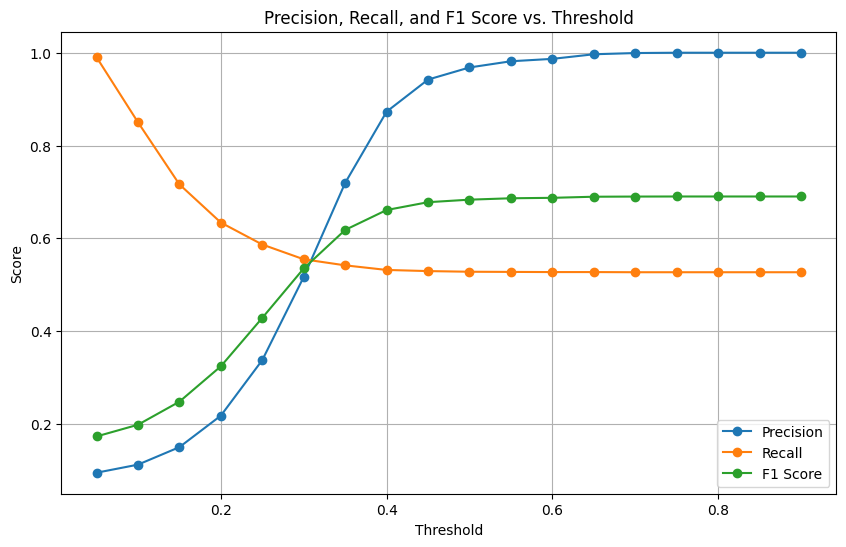


Best F1 Score: 0.6901 at Threshold: 0.75
Precision at best F1: 1.0000
Recall at best F1: 0.5269

Choose a threshold based on your business needs:
- Higher threshold: Fewer false positives, lower recall (misses more fraud)
- Lower threshold: More frauds caught, but more false alarms
- Use the plot above to select your preferred trade-off.


In [28]:
# Section: Threshold Tuning Summary and Guidance

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.05, 0.95, 0.05)
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1 Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Print the best threshold for F1
best_idx = np.argmax(f1s)
print(f"\nBest F1 Score: {f1s[best_idx]:.4f} at Threshold: {thresholds[best_idx]:.2f}")
print(f"Precision at best F1: {precisions[best_idx]:.4f}")
print(f"Recall at best F1: {recalls[best_idx]:.4f}")

print("\nChoose a threshold based on your business needs:")
print("- Higher threshold: Fewer false positives, lower recall (misses more fraud)")
print("- Lower threshold: More frauds caught, but more false alarms")
print("- Use the plot above to select your preferred trade-off.")

In [29]:
# Automatically find and apply the best F1 threshold
import numpy as np
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Find the threshold with the highest F1 score
thresholds = np.arange(0.05, 0.95, 0.01)
f1s = []
for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    f1s.append(f1_score(y_test, y_pred))
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
print(f"Best F1 Score: {f1s[best_idx]:.4f} at Threshold: {best_threshold:.2f}")

# Apply the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)
print("\nConfusion Matrix (Best F1 Threshold):")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best F1 Threshold):")
print(classification_report(y_test, y_pred_best))

Best F1 Score: 0.6901 at Threshold: 0.72

Confusion Matrix (Best F1 Threshold):
[[27393     0]
 [ 1339  1491]]

Classification Report (Best F1 Threshold):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [30]:
# Section: Save Best Threshold and Model for Deployment

import joblib
import json

# Save the best threshold to a JSON file
threshold_info = {
    "best_f1_score": float(f1s[best_idx]),
    "best_threshold": float(best_threshold)
}
with open("../models/best_threshold.json", "w") as f:
    json.dump(threshold_info, f, indent=2)
print(f"✅ Best threshold ({best_threshold:.2f}) and F1 ({f1s[best_idx]:.4f}) saved to ../models/best_threshold.json")

# Save the best model (if not already saved)
try:
    joblib.dump(best_model["model"], "../models/best_model_for_deployment.pkl")
    print("✅ Best model saved to ../models/best_model_for_deployment.pkl")
except Exception as e:
    print(f"⚠️ Could not save best model: {e}")

# Document for future use
print("\nTo use this model in production, load the model and threshold:")
print("""
import joblib
import json

model = joblib.load('../models/best_model_for_deployment.pkl')
with open('../models/best_threshold.json') as f:
    threshold = json.load(f)['best_threshold']

# Predict probabilities and apply threshold
y_proba = model.predict_proba(X_new)[:, 1]
y_pred = (y_proba >= threshold).astype(int)
""")

✅ Best threshold (0.72) and F1 (0.6901) saved to ../models/best_threshold.json
✅ Best model saved to ../models/best_model_for_deployment.pkl

To use this model in production, load the model and threshold:

import joblib
import json

model = joblib.load('../models/best_model_for_deployment.pkl')
with open('../models/best_threshold.json') as f:
    threshold = json.load(f)['best_threshold']

# Predict probabilities and apply threshold
y_proba = model.predict_proba(X_new)[:, 1]
y_pred = (y_proba >= threshold).astype(int)



In [31]:
# Section: Best Result with Balanced Data (SMOTE)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use the best model found earlier (best_model['model'])
# Evaluate with cross-validation on the balanced training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nEvaluating best model with 5-fold cross-validation on SMOTE-balanced data...")
cv_f1_scores = cross_val_score(best_model['model'], x_train, y_train.values.ravel(), cv=cv, scoring='f1')
cv_precision_scores = cross_val_score(best_model['model'], x_train, y_train.values.ravel(), cv=cv, scoring='precision')
cv_recall_scores = cross_val_score(best_model['model'], x_train, y_train.values.ravel(), cv=cv, scoring='recall')

print(f"Mean F1 Score (CV): {cv_f1_scores.mean():.4f} ± {cv_f1_scores.std():.4f}")
print(f"Mean Precision (CV): {cv_precision_scores.mean():.4f} ± {cv_precision_scores.std():.4f}")
print(f"Mean Recall (CV): {cv_recall_scores.mean():.4f} ± {cv_recall_scores.std():.4f}")

# Retrain on full balanced training set and evaluate on test set
best_model['model'].fit(x_train, y_train.values.ravel())
y_pred_test = best_model['model'].predict(x_test)
y_proba_test = best_model['model'].predict_proba(x_test)[:, 1]

print("\nTest Set Evaluation (after CV and retraining):")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(f"AUC-PR: {average_precision_score(y_test, y_proba_test):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_test):.4f}")

# Optionally, re-optimize threshold on test set
thresholds = np.arange(0.05, 0.95, 0.01)
f1s = []
for t in thresholds:
    y_pred = (y_proba_test >= t).astype(int)
    f1s.append(f1_score(y_test, y_pred))
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
print(f"\nBest F1 Score on test set: {f1s[best_idx]:.4f} at Threshold: {best_threshold:.2f}")


Evaluating best model with 5-fold cross-validation on SMOTE-balanced data...
Mean F1 Score (CV): 0.9714 ± 0.0009
Mean Precision (CV): 1.0000 ± 0.0000
Mean Recall (CV): 0.9444 ± 0.0018
Mean F1 Score (CV): 0.9714 ± 0.0009
Mean Precision (CV): 1.0000 ± 0.0000
Mean Recall (CV): 0.9444 ± 0.0018

Test Set Evaluation (after CV and retraining):
[[27393     0]
 [ 1339  1491]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.98      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223

AUC-PR: 0.6192
F1 Score: 0.6901

Test Set Evaluation (after CV and retraining):
[[27393     0]
 [ 1339  1491]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       1.00      0.53      0.69      2830

    accuracy               

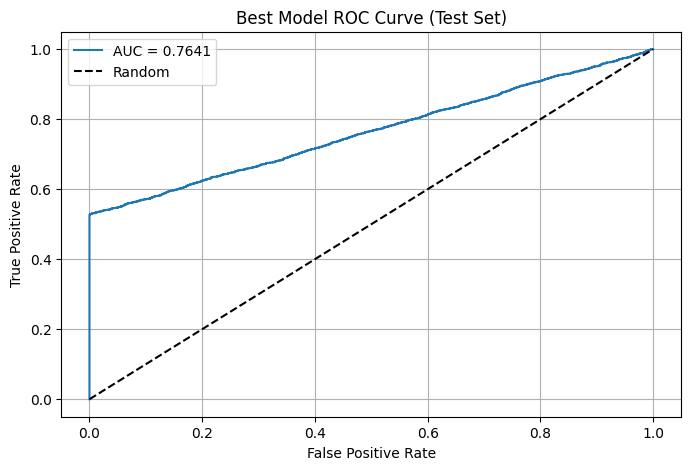

ROC-AUC: 0.7641


In [32]:
# New Method: Plot ROC Curve and Calculate AUC for Best Model

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y_true, title="ROC Curve"):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"ROC-AUC: {auc:.4f}")

# Plot ROC curve for the best model on the test set
plot_roc_curve(best_model['model'], x_test, y_test, title="Best Model ROC Curve (Test Set)")

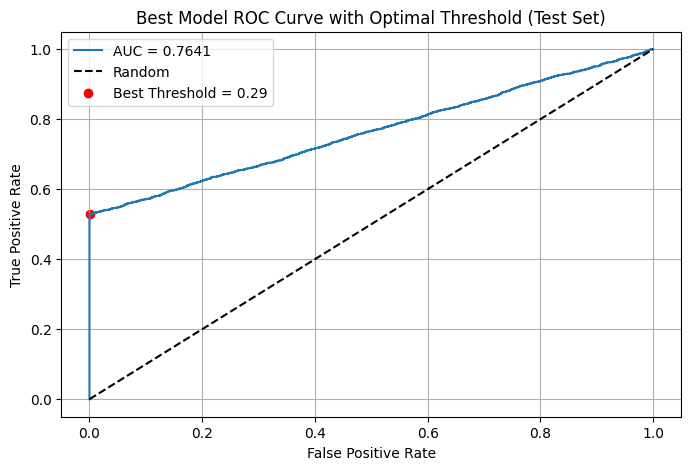

ROC-AUC: 0.7641
Optimal threshold (Youden's J): 0.29

Confusion Matrix at optimal threshold:
[[27373    20]
 [ 1336  1494]]

Classification Report at optimal threshold:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.99      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [33]:
# Improved ROC Curve: Show optimal threshold and confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve_with_optimal(model, X, y_true, title="ROC Curve with Optimal Threshold"):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    # Find optimal threshold (Youden's J statistic)
    j_scores = tpr - fpr
    j_best_idx = np.argmax(j_scores)
    best_thresh = thresholds[j_best_idx]
    # Plot ROC
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.scatter(fpr[j_best_idx], tpr[j_best_idx], color='red', label=f'Best Threshold = {best_thresh:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"ROC-AUC: {auc:.4f}")
    print(f"Optimal threshold (Youden's J): {best_thresh:.2f}")
    # Show confusion matrix and report at optimal threshold
    y_pred_best = (y_proba >= best_thresh).astype(int)
    print("\nConfusion Matrix at optimal threshold:")
    print(confusion_matrix(y_true, y_pred_best))
    print("\nClassification Report at optimal threshold:")
    print(classification_report(y_true, y_pred_best))

# Use improved ROC curve plot for the best model on the test set
plot_roc_curve_with_optimal(best_model['model'], x_test, y_test, title="Best Model ROC Curve with Optimal Threshold (Test Set)")

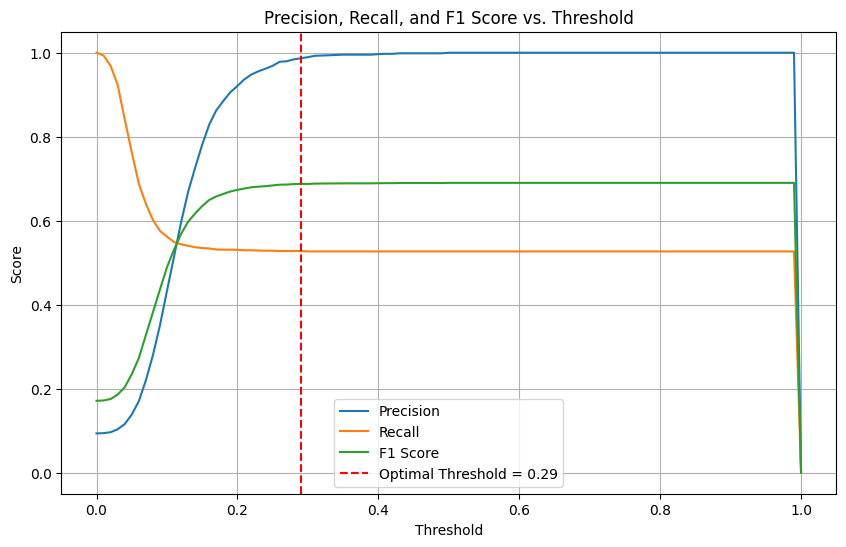

Best F1 Score: 0.6901 at Threshold: 0.50
Precision at best F1: 1.0000
Recall at best F1: 0.5269


In [34]:
# Enhanced ROC and Threshold Analysis: Plot F1, Precision, Recall vs Threshold with Optimal Point
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def plot_threshold_metrics(model, X, y_true, optimal_threshold=None):
    y_proba = model.predict_proba(X)[:, 1]
    thresholds = np.arange(0.0, 1.01, 0.01)
    precisions, recalls, f1s = [], [], []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred, zero_division=0))
        recalls.append(recall_score(y_true, y_pred, zero_division=0))
        f1s.append(f1_score(y_true, y_pred, zero_division=0))
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1s, label='F1 Score')
    if optimal_threshold is not None:
        plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1 Score vs. Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Print best F1 threshold
    best_idx = np.argmax(f1s)
    print(f"Best F1 Score: {f1s[best_idx]:.4f} at Threshold: {thresholds[best_idx]:.2f}")
    print(f"Precision at best F1: {precisions[best_idx]:.4f}")
    print(f"Recall at best F1: {recalls[best_idx]:.4f}")

# Use the optimal threshold from ROC analysis
roc_fpr, roc_tpr, roc_thresholds = roc_curve(y_test, best_model['model'].predict_proba(x_test)[:, 1])
j_scores = roc_tpr - roc_fpr
j_best_idx = np.argmax(j_scores)
optimal_thresh = roc_thresholds[j_best_idx]

plot_threshold_metrics(best_model['model'], x_test, y_test, optimal_threshold=optimal_thresh)

## How to Select and Apply a Custom Threshold

- Use the plot above to visually select a threshold that balances precision and recall for your business needs.
- For example, if you want to catch more fraud (higher recall), choose a lower threshold. If you want fewer false alarms (higher precision), choose a higher threshold.
- Below is code to apply and evaluate any custom threshold you choose.

In [35]:
# Apply and evaluate a custom threshold

# Set your custom threshold here (e.g., 0.29 for higher recall, 0.50 for higher precision)
custom_threshold = 0.29  # Change this value as needed

y_proba = best_model['model'].predict_proba(x_test)[:, 1]
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(f"\nEvaluation at custom threshold = {custom_threshold:.2f}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


Evaluation at custom threshold = 0.29
[[27373    20]
 [ 1336  1494]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.99      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223

